<a href="https://colab.research.google.com/github/lucash-h/SENG421/blob/main/csc421_fall_2025_asn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC421 Fall 2025 Assignment 2


This notebook is based on the supporting material for topics covered in **Chapter 7 - Logical Agents** and **Chapter 8 - First-Order Logic** from the book *Artificial Intelligence: A Modern Approach.*

The advanced questions typically require significantly more effort than the basic and expected questions. The assignment structure is as follows:

1. \[4 Marks\]: Propositional Logic (Basic) - simple prefix evaluator for 0, 1 and logical operators
2. \[4 Marks\]: Propositional Logic (Basic) - adding variables and bindings to the evaluator
3. \[6 Marks\]: Propositional Logic (Expected) - recursive prefix evaluator for propositional logic
4. \[5 Marks\]: Propositional Logic (Expected) - usage of the evaluator to evaluate some example logic expressions
5. \[9 Marks\]: Propositional Logic (Advanced) - model checking for the prefix evaluator
6. \[6 Marks\]: First-Order Logic (Expected) - kinship domain using Prolog for the Simpsons
7. \[10 Marks\]: First-Order Logic (Expected) - LegoWorld

# Part 1 Propositional Logic

## Parsing and evaluating prefix logic expressions  

In this part of the assignment, your task is to incrementally create a parser and evaluator for prefix logic expressions as well as implement simple model checking.

### Question 1 (Basic) - 4 Marks

Your first task will be to write a simple evaluator of prefix logic expressions with constants. In prefix notation, the operator precedes the operands and no operands are required. For example 5+3 in prefix notation is written + 5 3 or 5 * 2 + 3 would be written + * 5 2 3 or + * 5 2 * 3 4 is equivalent to (5 * 2) + (3 * 4).

As a first step, we will consider very simple expressions with one operator and two constant operands. We will use 0 for false and 1 for true. The following logical connectives should be implemented (see Figure 7.8 in your book). Notice that, for, now there is no negation symbol ~ :

1. & *and*
3. | *or*
4. => *implication*
5. <=> *biconditional*

Example expressions:
```
& 1 0  
=> 0 1
<=> 1 1
```

Your function should take as input a string with the prefix expression and return the result of evaluating the expression (a 1 for true and 0 for false). You can split a string into a list using .split[' ']. For this part of the assignment, you only evaluate expressions with two constant operands i.e. no nested/recursive expressions.

Implement: evaluate(s)

In [ ]:
# Basic split example
a = '& 1 0'
print(a.split(' '))

['&', '1', '0']


In [ ]:
# YOUR CODE GOES HERE
#INPUT: a string w/ prefix expression
#OUTPUT: 1 if TRUE, 0 if false
def evaluate(w):
  #tokenize on space first
  w_split = w.split(' ')
  result = 0
  #lambda ex: n = lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Zero"

  if w_split[0] == '&':
    result = (lambda w_split: 1 if w_split[1] == '1' and w_split[2] == '1' else 0)(w_split)
    print(f'AND OPERATION with {w_split[1]} AND {w_split[2]} with result {result}')

    #if w[0] is &
    # then if w[1] and w[2] == 1 then return 1 else return 0
  elif w_split[0] == '|':
    result = (lambda w_split: 1 if w_split[1] == '1' or w_split[2] == '1' else 0)(w_split)
    print(f'OR OPERATION with {w_split[1]} AND {w_split[2]} with result {result}')

  elif w_split[0] == '=>':
    print(f'Implication OPERATION with {w_split[1]} AND {w_split[2]}')
    result = (lambda w_split: 0 if w_split[1] == '1' and w_split[2] == '0' else 1)(w_split)
  elif w_split[0] == '<=>':
    print(f'Logical equivalence OPERATION with {w_split[1]} AND {w_split[2]}')
    result = (lambda w_split: 1 if w_split[1] == w_split[2] else 0)(w_split)

  return result



# Test cases, these will not work until you put your answer above
e1 = "| 0 1"
e2 = "<=> 1 1"
e3 = "& 0 0"
e4 = "=> 0 1"
e5 = "=> 1 0"

res_e1 = evaluate(e1)
res_e2 = evaluate(e2)
res_e3 = evaluate(e3)
res_e4 = evaluate(e4)
res_e5 = evaluate(e5)

print(f'{e1} = {res_e1}')
print(f'{e2} = {res_e2}')
print(f'{e3} = {res_e3}')
print(f'{e4} = {res_e4}')
print(f'{e5} = {res_e5}')

# Expected Output:
# | 0 1 = 1
# <=> 1 1 = 1
# & 0 0 = 0
# => 0 1 = 1
# => 1 0 = 0

OR OPERATION with 0 AND 1 with result 1
Logical equivalence OPERATION with 1 AND 1
AND OPERATION with 0 AND 0 with result 0
Implication OPERATION with 0 AND 1
Implication OPERATION with 1 AND 0
| 0 1 = 1
<=> 1 1 = 1
& 0 0 = 0
=> 0 1 = 1
=> 1 0 = 0


### Question 2 (Basic) - 4 Marks

Your next task is to implement a new evaluator that handles variables and bindings for your propositional logic evaluator. In this version, in addition to constants (0 and 1) you also can have variables which are strings with associated values provided in a dictionary. You still only consider two operands and one operator (no nesting). Your function should take as arguments the expression to be evaluated as a string and the dictionary with the variable bindings. In addition, you need to add the ~ (not) operator. To do so for each variable in the dictionary add a not version or the ability to evaluate a not version for all variables. For example if 'a' in the dictionary has a value of 1 the '~a' in the dictionary should have a value of 0. Notice that the not symbol is part of the string and it is NOT separated by a space in the syntax.


Implement: evaluate_with_bindings(s,d)

In [ ]:
# An example of a dictionary
d = {'foo': 0, 'b': 1, '0': 0, '1': 1}
print(d)

{'foo': 0, 'b': 1, '0': 0, '1': 1}


In [ ]:
# YOUR CODE GOES HERE

def evaluate_with_bindings(w, d):
  #go through every key
  w_split = w.split(' ')
  key_list = d.keys()

  first_arg = 0
  second_arg = 0


  for key in key_list:
    if(key in w_split[1]):
      if(w_split[1].startswith('~')):
        first_arg = abs(int(d[key]) - 1)  # changed to not
      else:
        first_arg = int(d[key])

    if(key in w_split[2]):
      if(w_split[2].startswith('~')):
        second_arg = abs(int(d[key]) - 1) # changed to not
      else:
        second_arg = int(d[key])
  #print(f'First arg: {first_arg}')
  #print(f'Second arg: {second_arg}')

  #operations with converted dictionary

#and operation
  if w_split[0] == '&':
    result = (lambda w_split: 1 if first_arg == 1 and second_arg == 1 else 0)(w_split)
    #print(f'AND OPERATION with {first_arg} AND {second_arg} with result {result}')

#or operation
  elif w_split[0] == '|':
    result = (lambda w_split: 1 if first_arg == 1 or second_arg == 1 else 0)(w_split)
    #print(f'OR OPERATION with {first_arg} AND {second_arg} with result {result}')

#logical implication operation
  elif w_split[0] == '=>':
    #print(f'Implication OPERATION with {first_arg} AND {second_arg}')
    result = (lambda w_split: 0 if first_arg == 1 and second_arg == 0 else 1)(w_split)

#logical equivalence operation
  elif w_split[0] == '<=>':
    #print(f'Logical equivalence OPERATION with {first_arg} AND {second_arg}')
    result = (lambda w_split: 1 if first_arg == second_arg else 0)(w_split)


# working operation
  #print(f'OPERATION {w_split[0]} FIRST ARG IS {first_arg} AND SECOND ARG IS {second_arg} result is {result}')

  return result




# Test cases, these will not work until you put your answer above
expr1 = '& 1 0'
expr2 = '& foo 1'
expr3 = '& foo ~b'
expr4 = '& ~foo b'
expr5 = '=> ~b foo'
expr6 = '<=> ~b foo'
expr7 = '<=> foo b'

res_be1 = evaluate_with_bindings(expr1,d)
res_be2 = evaluate_with_bindings(expr2,d)
res_be3 = evaluate_with_bindings(expr3,d)
res_be4 = evaluate_with_bindings(expr4,d)
res_be5 = evaluate_with_bindings(expr5,d)
res_be6 = evaluate_with_bindings(expr6,d)
res_be7 = evaluate_with_bindings(expr7,d)

print(f'{expr1} = {res_be1}')
print(f'{expr2} = {res_be2}')
print(f'{expr3} = {res_be3}')
print(f'{expr4} = {res_be4}')
print(f'{expr5} = {res_be5}')
print(f'{expr6} = {res_be6}')
print(f'{expr7} = {res_be7}')

#Expected output:
# & 1 0 = 0
# & foo 1 = 0
# & foo ~b = 0
# & ~foo b = 1
# => ~b foo = 1
# <=> ~b foo = 1
# <=> foo b = 0


& 1 0 = 0
& foo 1 = 0
& foo ~b = 0
& ~foo b = 1
=> ~b foo = 1
<=> ~b foo = 1
<=> foo b = 0


### Question 3 (Expected) - 6 Marks

The following code is a recursive evaluator for prefix arithmetic expressions. It assumes that there are always two operands either an integer or a prefix expression starting with an operator (addition or multiplication). It is a good idea to go through this function carefully by hand to understand how the recursion works.

Informed by your understanding of the arithmetic recursive_eval(l) function, your task is to write a function to implement a recursive prefix logic evaluator. Your evaluator should also support variable bindings using a dictionary like in the previous question.

You can write this code in many different ways. Try to keep it simple. SIDENOTE: If you are interested in lambda functions in Python, you can store all your operations in an operations dictionary where the keys are the operation strings, like "<=>", and the values are the lambda functions implementing your operations.

Example expressions:
```
& 1 & 1 a   
=> 0 & b ~alice  
<=> foo 1
```

Implement prefix_eval(input_str, d) and recursive_eval(l, d)

In [ ]:
x = lambda a, b, c : a + b + c #
print(x(5, 6, 2))              #

13


In [ ]:
def recursive_eval(l):
  #head and tail where head is operator, l is rest of expression
    head, tail = l[0], l[1:]
    #if operator
    if head in ['+', '*']:
      #then recursively call recursive eval on rest of expression
        val1, tail = recursive_eval(tail)
        val2, tail = recursive_eval(tail)
        #if operator is + then do that operation
        if head == '+':
            return (int(val1)+int(val2), tail)
        #if operator is * then do that operation
        elif head == '*':
            return (int(val1)*int(val2), tail)
    # operator is a number //added ie there are no more operations to conduct
    else:
        return (int(head),tail)

def prefix_eval(input_str):
  #splits input
    input_list = input_str.split(' ')
    #attributes head and tail to input_list
    res, tail = recursive_eval(input_list)
    return res

print(prefix_eval('1'))                   # = 1
print(prefix_eval('+ 1 2'))               # = 1 + 2
print(prefix_eval('+ 1 * 2 3'))           # = 1 + (2 * 3)
print(prefix_eval('+ * 5 2 * 3 + 1 5'))   # =  (5 * 2) + (3 * (1 + 5))

1
3
7
28


In [ ]:
'''
Informed by your understanding of the arithmetic recursive_eval(l) function,
your task is to write a function to implement a recursive prefix logic evaluator.
Your evaluator should also support variable bindings using a dictionary like in the previous question.
'''
#wat tha frick
# the evaluator should be able to literally just check if the thing is a number somewhere after evaluating the operand and before the other thingy
# or maybe it could just be in prefix evaluator and go through w before calling recursive eval?

In [ ]:
def recursive_eval_revised(l, d):
  #head and tail where head is operator, l is rest of expression
    head, tail = l[0], l[1:]
    #if first is + or * --> not sure what the difference is here vs & | ect
    if head in ['+', '*']:
      #then recursively call recursive eval on rest of expression
        val1, tail = recursive_eval_revised(tail, d)
        val1 = bullshit2(val1)
        val2, tail = recursive_eval_revised(tail, d)
        val2 = bullshit2(val2)

        #if operator is + then do that operation
        if head == '+':
            return (int(val1)+int(val2), tail)
        #if operator is * then do that operation
        elif head == '*':
            return (int(val1)*int(val2), tail)
    # operator is a number //added ie there are no more operations to conduct
    else:
        print(f'HERE IS HEAD: {head} AND TAIL: {tail}')
        return (head,tail)

def prefix_eval(input_str, d):
  #splits input
    input_list = input_str.split(' ')
    #attributes head and tail to input_list

    res, tail = recursive_eval_revised(input_list, d)
    return res

In [ ]:
# YOUR CODE GOES HERE

def bullshit(w,d):
  print(f'made it to bullshit, w is {w}')
  if w in d.keys(): # if the current string provided is part of dictionary
    if (w.startswith('~')):# if current string is not (~)
      return abs(int(d[w]) - 1) #then find corresponding value, then add ~ to it w/ |(val - 1)|
    else:
       return int(d[w])
  else:
    return w

def bullshit2(w, d):
  if(w.startswith('~')): # if not
    if(w[1:] in d.keys()): # if has symbol
      return abs(int(d[w[1:]]) - 1)
    else: # if not but doesnt have symbol (ie ~0 or ~1)
      return abs(int(d[w]) - 1)
  else: #doesnt have a not
    if w in d.keys(): # has a symbol
      return d[w]
    else:
      return w


# Tests
d = {"a": 1, "b": 0, "alice": 1, "foo": 1, '0': 0, '1': 1}
pe1 = "& a | 0 1"
pe2 = "& 0 | 1 b"
pe2 = "| 1 => ~b b"
pe3 = "<=> b <=> ~b 0"
pe4 = "=> 1 & a 0"
pe5 = "& ~a <=> 0 0"
pe6 = "& 1 & 1 a"
pe7 = "=> 0 & b ~alice"
pe8 = "<=> foo 1"

print(d)
for e in [pe1,pe2,pe3,pe4,pe5,pe6,pe7,pe8]:
    print("%s\t= %d" % (e, prefix_eval(e,d)))

# Expected output
# {'a': 1, 'b': 0, 'alice': 1, 'foo': 1, '0': 0, '1': 1}
# & a | 0 1	= 1
# | 1 => ~b b	= 1
# <=> b <=> ~b 0	= 1
# => 1 & a 0	= 0
# & ~a <=> 0 0	= 0
# & 1 & 1 a	= 1
# => 0 & b ~alice	= 1
# <=> foo 1	= 1

{'a': 1, 'b': 0, 'alice': 1, 'foo': 1, '0': 0, '1': 1}
HERE IS HEAD: & AND TAIL: ['a', '|', '0', '1']


ValueError: invalid literal for int() with base 10: '&'

### QUESTION 4 (EXPECTED) - 5 Marks


Using the recursive prefix evaluator you defined in the previous question answer the following question ( do not modify the evaluator for this question ). You will need to convert the expressions below--you may need logical equivalences to produce a expressions that your evaluator can parse. You can use multiple string assignments to assemble more complicated sentences into one big string:


Let A be the formula:

\begin{equation}
  (( p_{1} \rightarrow (p_{2} \land p_{3})) \lor ((\neg p_{1})
  \rightarrow (p_{3} \land p_{4})))
\end{equation}

Let B be the formula:

\begin{equation}
  (( p_{3} \rightarrow (\neg p_{6})) \land ((\neg
  p_{3}) \rightarrow (p_{4} \rightarrow p_{1})))  
\end{equation}

Let C be the formula:

\begin{equation}
  ((p_{2} \rightarrow p_{5}) \land (\neg(p_{2} \land p_{5})))
\end{equation}

Let D be the formula:

\begin{equation}
  (\neg (p_{3} \rightarrow p_{6}))
\end{equation}

Evaluate the formulate E:
\begin{equation}
  (( A \leftrightarrow (B \land C)) \rightarrow D)
\end{equation}

under the true assignment $I_{1}$, where $I_{1}(p_{1}) = I_{1}(p_{3}) = I_{1}(p_{5}) = false$
and $I_{1}(p2) = I_{1}(p_{4}) = I_{1}(p_{6}) = true$ as well as under the truth assignment
$I_{2}$, where $I_{2}(p_{1}) = I_{2}(p_{3}) = I_{2}(p_{5}) = true$ and
$I_{2}(p_{2})=I_{2}(p_{4})=I_{2}(p_{6}) = false$.


In [ ]:
#basically I just have to convert the two????
#also should add cases for a - e

In [ ]:
a = '(p1=> (p2 & p3)) |(( ~p1) => (p3 & p4))'
b = '((p3=>(~p6))&((~p3)=>(p4=>p1)))'

In [ ]:
#maybe this should be more sophisticated and just add the shit together?
def two_string_logical_equivalence(w1, w2, d):
  w1_evaluated = prefix_eval(w1, d)
  w2_evaluated = prefix_eval(w2, d)

  return w1_evaluated == w2_evaluated

In [ ]:
## YOUR CODE GOES HERE

# I1 testcases
print("I1 Results")
print("A: %s \t = %d" % (A, prefix_eval(A, i1)))
print("B: %s \t\t = %d" % (B, prefix_eval(B, i1)))
print("C: %s \t\t = %d" % (C, prefix_eval(C, i1)))
print("D: %s \t\t\t\t = %d" % (D, prefix_eval(D, i1)))
print("E: %s = %d" % (E, prefix_eval(E, i1)))
# results: 1, 0, 0, 0, 1

# I2 testcases
print("\nI2 Results")
print("A: %s \t = %d" % (A, prefix_eval(A, i2)))
print("B: %s \t\t = %d" % (B, prefix_eval(B, i2)))
print("C: %s \t\t = %d" % (C, prefix_eval(C, i2)))
print("D: %s \t\t\t\t = %d" % (D, prefix_eval(D, i2)))
print("E: %s = %d" % (E, prefix_eval(E, i2)))
# results: 1, 1, 1, 1, 1

I1 Results


NameError: name 'A' is not defined

### QUESTION 5 (ADVANCED) - 9 Marks

Implement inference using model-checking using your prefix recursive evaluator to decide whether a knowledge base KB entails some sentence a. To do so:
1. express the knowledge base in the prefix notation
2. enumerate all models for the variables in the dictionary
3. check that the sentence a is true in every model in which the KB is true.

You can check the implementation to tt_entails in logic.ipynb in the aima_python repository to inform how you implement your solution. Your solution should NOT rely directly on any code in logic.py or logic.ipynb.

Check you model checking by showing whether A & (B | C) & D & E & (~F & ~G) entails A & D & E & ~F & ~G.
You will need to convert this example to prefix notation. It is also a good idea to check a
few simple cases to confirm that your approach works.


In [ ]:
#what to do
'''
Does this mean I have to create a truth table of all sets of possible value associations to model
That would be cooked but ig
holy shit its craaaazy

'''

In [ ]:
# YOUR CODE GOES HERE


# Testcase, this will not work until you put your answer above
print(entails(kb, a))

# Expected Output
# True

NameError: name 'entails' is not defined

# Part 2 First-Order Logic

## Part 1 Kinship Domain

### QUESTION 6 (EXPECTED) - 6 Marks

#### The Simpsons Family

You will encode a modified version of the kinship domain described in section 8.3.2 of the textbook using prolog to encode as facts the relationships between the members of the Simpsons family from the popular TV show. You will code in the browser here: https://swish.swi-prolog.org/, **Then you must paste this code in this notebook for marking below.**

First start with creating the modified kinship domain described here. A gender-neutral kinship domain that captures the following binary predicates:
parent, sibling, child, grandparent

Then encode the relationships of the Simpsons family (see questions below to see how many characters you need to represent):
https://en.wikipedia.org/wiki/Simpson_family

Show how the following queries can be answered using this KB:

* Who are the children of Homer?
* Who are the parents of Bart?
* Are Lisa and Homer siblings?
* Are Lisa and Bart siblings?
* Who are Lisa and Bart's grandparents?

You should implement all relationships as parent relationships, then the predicates child, sibling, grandparent can be entirely implemented as parent relationships.

In [ ]:
% Facts
% parent relationships,
% then the predicates
% 	child,
% 	sibling,
% 	grandparent
% can be entirely implemented as parent relationships.
% ***atoms are lowercase, variables start Uppercase
% :- is if

person(homer).
person(marge).
person(bart).
person(lisa).
person(maggie).
person(abe).  %homer dad
person(mona). %homers mother


parent(homer, bart).
parent(homer, lisa).
parent(homer, maggie).

parent(marge, bart).
parent(marge, lisa).
parent(marge, maggie).

parent(abe, homer).
parent(mona, homer).
parent(clancy, marge).
parent(jacqueline, marge).


% Rules

child(Child, Parent) :-
    parent(Parent, Child).

siblings(Person1, Person2) :-
    parent(X, Person2),
    parent(X, Person1),
	Person1 \= Person2.


grandparents(GP, Child) :-
    parent(GP, Parent),
    parent(Parent, Child).


In [ ]:
# YOUR CODE GOES HERE - NOTE THAT WE RUN THIS IN PROLOG via https://swish.swi-prolog.org/ NOT HERE IN THE NOTEBOOK


% Testcases and expected outputs, note that these will output correct values depending on how you query them.
% We really only care if they are correct, meaning marks are only lost when they are incorrect.
% You may get false for example at the end of a query if you repeatedly click next in SWISH, or repeated values.
% As long as your outputs are correct we do not care about spurious outputs, but queries should terminate.
% child(X, homer).
%   X = bart
%   X = lisa
%   X = maggie
% parent(X, bart).
%   X = homer
%   X = marge
% siblings(lisa, homer).
%   false
% siblings(lisa, bart).
%   true
% grandparent(X, lisa).
%   X = abraham
%   X = mona
%   X = clancy
%   X = jacqueline
% grandparent(X, bart).
%   X = abraham
%   X = mona
%   X = clancy
%   X = jacqueline

UsageError: Line magic function `%` not found.


## Legoworld

### QUESTION 7 (ADVANCED) - 10 Marks


In this question, we explore the use of FOL to encode knowledge about the objects and arrangement of a simple world created by different Lego pieces. Our world will consist of making simple structures by placing Lego pieces on top of each other.  Each Lego piece will be identified by a unique identifier (the letters in the figure below).

Let's look at a specific example where each piece is labelled by a letter:

<img src="lego_letters.png" width="60%"/>

This corresponds to the following picture:

<img src="lego2.png" width="60%"/>



We can use the following predicates to model the world:
* OnPlate(p): p is attached to the bottom plate
* On(p1,p2): piece p1 is placed directly on top of piece p2
* AtLeft(p1,p2): piece p1 and piece p2 are placed on the plate, and piece p1 is direct at the left of p2
* Color(p,c): The colour of piece p is c (Red, Grey, Brown, White, Yellow, Blue)
* Type(p,t): The type of piece p is t (Brick, Plate, Tile)

<img src="lego3.png" width="20%"/>


Each piece will be identified by the letters appearing in the picture. The thicker brick with top studs will have the type Brick, the thinner brick with top studs is of type Plate, and the one that is flat on the top is of type Tile.


Use the FO KB implementation in logic.py to:

1. Write a database of facts which models the world in the picture. For example, you can use clauses.append(expr('TypeOf(A,Brick)')) to state that Lego piece A is a Brick.

2. Based exclusively on using these predicates (OnPlate, On, AtLeft), define the following predicates:
    1. Base(b1, b2): b2 is the base of the tower containing b1.
    2. Base_at_right(b1, b2): b1 and b2 are on the plate, and b2 is at the right (but perhaps not directly) of b1.
    3. Object_at_right(b1, b2): b1 is in a pile which is at the right (but perhaps not directly) of b2.
    
    
The above predicates must work for any world defined using the facts specified by OnPlate, On,
AtLeft not just the specific example encoded above. In other words, these predicates should be defined
in terms of the existing predicates and variables. As an example here is the definition of Base.

    * clauses.append(expr('OnPlate(x) ==> Base(x,x)'))
    * clauses.append(expr('On(x,z) & Base (z,y) ==> Base(x,y)'))
    
This is a recursive definition it is a good idea to see how it works by doing substitutions by hand.


3. Using the KB you created answer the following queries (see test cases below you will need to define some helper predicates):
    1. Is piece B on top of piece C?
    2. What is the type and colour of the piece on top of C?
    3. What is the type of the base of H?
    4. What are the pieces that are right of C?
    5. What are all the pieces that are on top of i?

In [1]:
# The following code is taken from the AIMA code repository. It allows you to define a First Order KB and query it
import itertools
import collections

class KB:
    """A knowledge base to which you can tell and ask sentences.
    To create a KB, first subclass this class and implement
    tell, ask_generator, and retract. Why ask_generator instead of ask?
    The book is a bit vague on what ask means --
    For a Propositional Logic KB, ask(P & Q) returns True or False, but for an
    FOL KB, something like ask(Brother(x, y)) might return many substitutions
    such as {x: Cain, y: Abel}, {x: Abel, y: Cain}, {x: George, y: Jeb}, etc.
    So ask_generator generates these one at a time, and ask either returns the
    first one or returns False."""

    def __init__(self, sentence=None):
        if sentence:
            self.tell(sentence)

    def tell(self, sentence):
        """Add the sentence to the KB."""
        raise NotImplementedError

    def ask(self, query):
        """Return a substitution that makes the query true, or, failing that, return False."""
        return first(self.ask_generator(query), default=False)

    def ask_generator(self, query):
        """Yield all the substitutions that make query true."""
        raise NotImplementedError

    def retract(self, sentence):
        """Remove sentence from the KB."""
        raise NotImplementedError


class KB:
    """A knowledge base to which you can tell and ask sentences.
    To create a KB, first subclass this class and implement
    tell, ask_generator, and retract. Why ask_generator instead of ask?
    The book is a bit vague on what ask means --
    For a Propositional Logic KB, ask(P & Q) returns True or False, but for an
    FOL KB, something like ask(Brother(x, y)) might return many substitutions
    such as {x: Cain, y: Abel}, {x: Abel, y: Cain}, {x: George, y: Jeb}, etc.
    So ask_generator generates these one at a time, and ask either returns the
    first one or returns False."""

    def __init__(self, sentence=None):
        if sentence:
            self.tell(sentence)

    def tell(self, sentence):
        """Add the sentence to the KB."""
        raise NotImplementedError

    def ask(self, query):
        """Return a substitution that makes the query true, or, failing that, return False."""
        return first(self.ask_generator(query), default=False)

    def ask_generator(self, query):
        """Yield all the substitutions that make query true."""
        raise NotImplementedError

    def retract(self, sentence):
        """Remove sentence from the KB."""
        raise NotImplementedError


class PropKB(KB):
    """A KB for propositional logic. Inefficient, with no indexing."""

    def __init__(self, sentence=None):
        super().__init__(sentence)
        self.clauses = []

    def tell(self, sentence):
        """Add the sentence's clauses to the KB."""
        self.clauses.extend(conjuncts(to_cnf(sentence)))

    def ask_generator(self, query):
        """Yield the empty substitution {} if KB entails query; else no results."""
        if tt_entails(Expr('&', *self.clauses), query):
            yield {}

    def ask_if_true(self, query):
        """Return True if the KB entails query, else return False."""
        for _ in self.ask_generator(query):
            return True
        return False

    def retract(self, sentence):
        """Remove the sentence's clauses from the KB."""
        for c in conjuncts(to_cnf(sentence)):
            if c in self.clauses:
                self.clauses.remove(c)



# ______________________________________________________________________________
# Expressions

# See https://docs.python.org/3/reference/expressions.html#operator-precedence
# See https://docs.python.org/3/reference/datamodel.html#special-method-names

class Expr:
    """A mathematical expression with an operator and 0 or more arguments.
    op is a str like '+' or 'sin'; args are Expressions.
    Expr('x') or Symbol('x') creates a symbol (a nullary Expr).
    Expr('-', x) creates a unary; Expr('+', x, 1) creates a binary."""

    def __init__(self, op, *args):
        self.op = str(op)
        self.args = args

    # Operator overloads
    def __neg__(self):
        return Expr('-', self)

    def __pos__(self):
        return Expr('+', self)

    def __invert__(self):
        return Expr('~', self)

    def __add__(self, rhs):
        return Expr('+', self, rhs)

    def __sub__(self, rhs):
        return Expr('-', self, rhs)

    def __mul__(self, rhs):
        return Expr('*', self, rhs)

    def __pow__(self, rhs):
        return Expr('**', self, rhs)

    def __mod__(self, rhs):
        return Expr('%', self, rhs)

    def __and__(self, rhs):
        return Expr('&', self, rhs)

    def __xor__(self, rhs):
        return Expr('^', self, rhs)

    def __rshift__(self, rhs):
        return Expr('>>', self, rhs)

    def __lshift__(self, rhs):
        return Expr('<<', self, rhs)

    def __truediv__(self, rhs):
        return Expr('/', self, rhs)

    def __floordiv__(self, rhs):
        return Expr('//', self, rhs)

    def __matmul__(self, rhs):
        return Expr('@', self, rhs)

    def __or__(self, rhs):
        """Allow both P | Q, and P |'==>'| Q."""
        if isinstance(rhs, Expression):
            return Expr('|', self, rhs)
        else:
            return PartialExpr(rhs, self)

    # Reverse operator overloads
    def __radd__(self, lhs):
        return Expr('+', lhs, self)

    def __rsub__(self, lhs):
        return Expr('-', lhs, self)

    def __rmul__(self, lhs):
        return Expr('*', lhs, self)

    def __rdiv__(self, lhs):
        return Expr('/', lhs, self)

    def __rpow__(self, lhs):
        return Expr('**', lhs, self)

    def __rmod__(self, lhs):
        return Expr('%', lhs, self)

    def __rand__(self, lhs):
        return Expr('&', lhs, self)

    def __rxor__(self, lhs):
        return Expr('^', lhs, self)

    def __ror__(self, lhs):
        return Expr('|', lhs, self)

    def __rrshift__(self, lhs):
        return Expr('>>', lhs, self)

    def __rlshift__(self, lhs):
        return Expr('<<', lhs, self)

    def __rtruediv__(self, lhs):
        return Expr('/', lhs, self)

    def __rfloordiv__(self, lhs):
        return Expr('//', lhs, self)

    def __rmatmul__(self, lhs):
        return Expr('@', lhs, self)

    def __call__(self, *args):
        """Call: if 'f' is a Symbol, then f(0) == Expr('f', 0)."""
        if self.args:
            raise ValueError('Can only do a call for a Symbol, not an Expr')
        else:
            return Expr(self.op, *args)

    # Equality and repr
    def __eq__(self, other):
        """x == y' evaluates to True or False; does not build an Expr."""
        return isinstance(other, Expr) and self.op == other.op and self.args == other.args

    def __lt__(self, other):
        return isinstance(other, Expr) and str(self) < str(other)

    def __hash__(self):
        return hash(self.op) ^ hash(self.args)

    def __repr__(self):
        op = self.op
        args = [str(arg) for arg in self.args]
        if op.isidentifier():  # f(x) or f(x, y)
            return '{}({})'.format(op, ', '.join(args)) if args else op
        elif len(args) == 1:  # -x or -(x + 1)
            return op + args[0]
        else:  # (x - y)
            opp = (' ' + op + ' ')
            return '(' + opp.join(args) + ')'


# An 'Expression' is either an Expr or a Number.
# Symbol is not an explicit type; it is any Expr with 0 args.


Number = (int, float, complex)
Expression = (Expr, Number)


def Symbol(name):
    """A Symbol is just an Expr with no args."""
    return Expr(name)


def symbols(names):
    """Return a tuple of Symbols; names is a comma/whitespace delimited str."""
    return tuple(Symbol(name) for name in names.replace(',', ' ').split())


def subexpressions(x):
    """Yield the subexpressions of an Expression (including x itself)."""
    yield x
    if isinstance(x, Expr):
        for arg in x.args:
            yield from subexpressions(arg)


def arity(expression):
    """The number of sub-expressions in this expression."""
    if isinstance(expression, Expr):
        return len(expression.args)
    else:  # expression is a number
        return 0


# For operators that are not defined in Python, we allow new InfixOps:


class PartialExpr:
    """Given 'P |'==>'| Q, first form PartialExpr('==>', P), then combine with Q."""

    def __init__(self, op, lhs):
        self.op, self.lhs = op, lhs

    def __or__(self, rhs):
        return Expr(self.op, self.lhs, rhs)

    def __repr__(self):
        return "PartialExpr('{}', {})".format(self.op, self.lhs)


def expr(x):
    """Shortcut to create an Expression. x is a str in which:
    - identifiers are automatically defined as Symbols.
    - ==> is treated as an infix |'==>'|, as are <== and <=>.
    If x is already an Expression, it is returned unchanged. Example:
    >>> expr('P & Q ==> Q')
    ((P & Q) ==> Q)
    """
    return eval(expr_handle_infix_ops(x), defaultkeydict(Symbol)) if isinstance(x, str) else x


infix_ops = '==> <== <=>'.split()


def expr_handle_infix_ops(x):
    """Given a str, return a new str with ==> replaced by |'==>'|, etc.
    >>> expr_handle_infix_ops('P ==> Q')
    "P |'==>'| Q"
    """
    for op in infix_ops:
        x = x.replace(op, '|' + repr(op) + '|')
    return x


class defaultkeydict(collections.defaultdict):
    """Like defaultdict, but the default_factory is a function of the key.
    >>> d = defaultkeydict(len); d['four']
    4
    """

    def __missing__(self, key):
        self[key] = result = self.default_factory(key)
        return result


class hashabledict(dict):
    """Allows hashing by representing a dictionary as tuple of key:value pairs.
    May cause problems as the hash value may change during runtime."""

    def __hash__(self):
        return 1


# ______________________________________________________________________________

# Convert to Conjunctive Normal Form (CNF)


def to_cnf(s):
    """
    [Page 253]
    Convert a propositional logical sentence to conjunctive normal form.
    That is, to the form ((A | ~B | ...) & (B | C | ...) & ...)
    >>> to_cnf('~(B | C)')
    (~B & ~C)
    """
    s = expr(s)
    if isinstance(s, str):
        s = expr(s)
    s = eliminate_implications(s)  # Steps 1, 2 from p. 253
    s = move_not_inwards(s)  # Step 3
    return distribute_and_over_or(s)  # Step 4


def eliminate_implications(s):
    """Change implications into equivalent form with only &, |, and ~ as logical operators."""
    s = expr(s)
    if not s.args or is_symbol(s.op):
        return s  # Atoms are unchanged.
    args = list(map(eliminate_implications, s.args))
    a, b = args[0], args[-1]
    if s.op == '==>':
        return b | ~a
    elif s.op == '<==':
        return a | ~b
    elif s.op == '<=>':
        return (a | ~b) & (b | ~a)
    elif s.op == '^':
        assert len(args) == 2  # TODO: relax this restriction
        return (a & ~b) | (~a & b)
    else:
        assert s.op in ('&', '|', '~')
        return Expr(s.op, *args)


def move_not_inwards(s):
    """Rewrite sentence s by moving negation sign inward.
    >>> move_not_inwards(~(A | B))
    (~A & ~B)
    """
    s = expr(s)
    if s.op == '~':
        def NOT(b):
            return move_not_inwards(~b)

        a = s.args[0]
        if a.op == '~':
            return move_not_inwards(a.args[0])  # ~~A ==> A
        if a.op == '&':
            return associate('|', list(map(NOT, a.args)))
        if a.op == '|':
            return associate('&', list(map(NOT, a.args)))
        return s
    elif is_symbol(s.op) or not s.args:
        return s
    else:
        return Expr(s.op, *list(map(move_not_inwards, s.args)))


def distribute_and_over_or(s):
    """Given a sentence s consisting of conjunctions and disjunctions
    of literals, return an equivalent sentence in CNF.
    >>> distribute_and_over_or((A & B) | C)
    ((A | C) & (B | C))
    """
    s = expr(s)
    if s.op == '|':
        s = associate('|', s.args)
        if s.op != '|':
            return distribute_and_over_or(s)
        if len(s.args) == 0:
            return False
        if len(s.args) == 1:
            return distribute_and_over_or(s.args[0])
        conj = first(arg for arg in s.args if arg.op == '&')
        if not conj:
            return s
        others = [a for a in s.args if a is not conj]
        rest = associate('|', others)
        return associate('&', [distribute_and_over_or(c | rest)
                               for c in conj.args])
    elif s.op == '&':
        return associate('&', list(map(distribute_and_over_or, s.args)))
    else:
        return s


def associate(op, args):
    """Given an associative op, return an expression with the same
    meaning as Expr(op, *args), but flattened -- that is, with nested
    instances of the same op promoted to the top level.
    >>> associate('&', [(A&B),(B|C),(B&C)])
    (A & B & (B | C) & B & C)
    >>> associate('|', [A|(B|(C|(A&B)))])
    (A | B | C | (A & B))
    """
    args = dissociate(op, args)
    if len(args) == 0:
        return _op_identity[op]
    elif len(args) == 1:
        return args[0]
    else:
        return Expr(op, *args)


_op_identity = {'&': True, '|': False, '+': 0, '*': 1}


def dissociate(op, args):
    """Given an associative op, return a flattened list result such
    that Expr(op, *result) means the same as Expr(op, *args).
    >>> dissociate('&', [A & B])
    [A, B]
    """
    result = []

    def collect(subargs):
        for arg in subargs:
            if arg.op == op:
                collect(arg.args)
            else:
                result.append(arg)

    collect(args)
    return result


def conjuncts(s):
    """Return a list of the conjuncts in the sentence s.
    >>> conjuncts(A & B)
    [A, B]
    >>> conjuncts(A | B)
    [(A | B)]
    """
    return dissociate('&', [s])


def disjuncts(s):
    """Return a list of the disjuncts in the sentence s.
    >>> disjuncts(A | B)
    [A, B]
    >>> disjuncts(A & B)
    [(A & B)]
    """
    return dissociate('|', [s])


def is_symbol(s):
    """A string s is a symbol if it starts with an alphabetic char.
    >>> is_symbol('R2D2')
    True
    """
    return isinstance(s, str) and s[:1].isalpha()


def first(iterable, default=None):
    """Return the first element of an iterable; or default."""
    return next(iter(iterable), default)

def unique(seq):
    """Remove duplicate elements from seq. Assumes hashable elements."""
    return list(set(seq))

def remove_all(item, seq):
    """Return a copy of seq (or string) with all occurrences of item removed."""
    if isinstance(seq, str):
        return seq.replace(item, '')
    elif isinstance(seq, set):
        rest = seq.copy()
        rest.remove(item)
        return rest
    else:
        return [x for x in seq if x != item]


# ______________________________________________________________________________

def tt_entails(kb, alpha):
    """
    [Figure 7.10]
    Does kb entail the sentence alpha? Use truth tables. For propositional
    kb's and sentences. Note that the 'kb' should be an Expr which is a
    conjunction of clauses.
    >>> tt_entails(expr('P & Q'), expr('Q'))
    True
    """
    assert not variables(alpha)
    symbols = list(prop_symbols(kb & alpha))
    return tt_check_all(kb, alpha, symbols, {})


def tt_check_all(kb, alpha, symbols, model):
    """Auxiliary routine to implement tt_entails."""
    if not symbols:
        if pl_true(kb, model):
            result = pl_true(alpha, model)
            assert result in (True, False)
            return result
        else:
            return True
    else:
        P, rest = symbols[0], symbols[1:]
        return (tt_check_all(kb, alpha, rest, extend(model, P, True)) and
                tt_check_all(kb, alpha, rest, extend(model, P, False)))

def variables(s):
    """Return a set of the variables in expression s.
    >>> variables(expr('F(x, x) & G(x, y) & H(y, z) & R(A, z, 2)')) == {x, y, z}
    True
    """
    return {x for x in subexpressions(s) if is_variable(x)}

def is_variable(x):
    """A variable is an Expr with no args and a lowercase symbol as the op."""
    return isinstance(x, Expr) and not x.args and x.op[0].islower()

def prop_symbols(x):
    """Return the set of all propositional symbols in x."""
    if not isinstance(x, Expr):
        return set()
    elif is_prop_symbol(x.op):
        return {x}
    else:
        return {symbol for arg in x.args for symbol in prop_symbols(arg)}


def is_prop_symbol(s):
    """A proposition logic symbol is an initial-uppercase string.
    >>> is_prop_symbol('exe')
    False
    """
    return is_symbol(s) and s[0].isupper()

def extend(s, var, val):
    """Copy dict s and extend it by setting var to val; return copy."""
    return {**s, var: val}


def pl_true(exp, model={}):
    """Return True if the propositional logic expression is true in the model,
    and False if it is false. If the model does not specify the value for
    every proposition, this may return None to indicate 'not obvious';
    this may happen even when the expression is tautological.
    >>> pl_true(P, {}) is None
    True
    """
    if exp in (True, False):
        return exp
    op, args = exp.op, exp.args
    if is_prop_symbol(op):
        return model.get(exp)
    elif op == '~':
        p = pl_true(args[0], model)
        if p is None:
            return None
        else:
            return not p
    elif op == '|':
        result = False
        for arg in args:
            p = pl_true(arg, model)
            if p is True:
                return True
            if p is None:
                result = None
        return result
    elif op == '&':
        result = True
        for arg in args:
            p = pl_true(arg, model)
            if p is False:
                return False
            if p is None:
                result = None
        return result
    p, q = args
    if op == '==>':
        return pl_true(~p | q, model)
    elif op == '<==':
        return pl_true(p | ~q, model)
    pt = pl_true(p, model)
    if pt is None:
        return None
    qt = pl_true(q, model)
    if qt is None:
        return None
    if op == '<=>':
        return pt == qt
    elif op == '^':  # xor or 'not equivalent'
        return pt != qt
    else:
        raise ValueError('Illegal operator in logic expression' + str(exp))


class FolKB(KB):
    """A knowledge base consisting of first-order definite clauses.
    >>> kb0 = FolKB([expr('Farmer(Mac)'), expr('Rabbit(Pete)'),
    ...              expr('(Rabbit(r) & Farmer(f)) ==> Hates(f, r)')])
    >>> kb0.tell(expr('Rabbit(Flopsie)'))
    >>> kb0.retract(expr('Rabbit(Pete)'))
    >>> kb0.ask(expr('Hates(Mac, x)'))[x]
    Flopsie
    >>> kb0.ask(expr('Wife(Pete, x)'))
    False
    """

    def __init__(self, clauses=None):
        super().__init__()
        self.clauses = []  # inefficient: no indexing
        if clauses:
            for clause in clauses:
                self.tell(clause)

    def tell(self, sentence):
        if is_definite_clause(sentence):
            self.clauses.append(sentence)
        else:
            raise Exception('Not a definite clause: {}'.format(sentence))

    def ask_generator(self, query):
        return fol_bc_ask(self, query)

    def retract(self, sentence):
        self.clauses.remove(sentence)

    def fetch_rules_for_goal(self, goal):
        return self.clauses


def fol_bc_ask(kb, query):
    """
    [Figure 9.6]
    A simple backward-chaining algorithm for first-order logic.
    KB should be an instance of FolKB, and query an atomic sentence.
    """
    return fol_bc_or(kb, query, {})


def fol_bc_or(kb, goal, theta):
    for rule in kb.fetch_rules_for_goal(goal):
        lhs, rhs = parse_definite_clause(standardize_variables(rule))
        for theta1 in fol_bc_and(kb, lhs, unify_mm(rhs, goal, theta)):
            yield theta1


def fol_bc_and(kb, goals, theta):
    if theta is None:
        pass
    elif not goals:
        yield theta
    else:
        first, rest = goals[0], goals[1:]
        for theta1 in fol_bc_or(kb, subst(theta, first), theta):
            for theta2 in fol_bc_and(kb, rest, theta1):
                yield theta2

def is_definite_clause(s):
    """Returns True for exprs s of the form A & B & ... & C ==> D,
    where all literals are positive. In clause form, this is
    ~A | ~B | ... | ~C | D, where exactly one clause is positive.
    >>> is_definite_clause(expr('Farmer(Mac)'))
    True
    """
    if is_symbol(s.op):
        return True
    elif s.op == '==>':
        antecedent, consequent = s.args
        return is_symbol(consequent.op) and all(is_symbol(arg.op) for arg in conjuncts(antecedent))
    else:
        return False


def parse_definite_clause(s):
    """Return the antecedents and the consequent of a definite clause."""
    assert is_definite_clause(s)
    if is_symbol(s.op):
        return [], s
    else:
        antecedent, consequent = s.args
        return conjuncts(antecedent), consequent

def constant_symbols(x):
    """Return the set of all constant symbols in x."""
    if not isinstance(x, Expr):
        return set()
    elif is_prop_symbol(x.op) and not x.args:
        return {x}
    else:
        return {symbol for arg in x.args for symbol in constant_symbols(arg)}


def unify_mm(x, y, s={}):
    """Unify expressions x,y with substitution s using an efficient rule-based
    unification algorithm by Martelli & Montanari; return a substitution that
    would make x,y equal, or None if x,y can not unify. x and y can be
    variables (e.g. Expr('x')), constants, lists, or Exprs.
    >>> unify_mm(x, 3, {})
    {x: 3}
    """

    set_eq = extend(s, x, y)
    s = set_eq.copy()
    while True:
        trans = 0
        for x, y in set_eq.items():
            if x == y:
                # if x = y this mapping is deleted (rule b)
                del s[x]
            elif not is_variable(x) and is_variable(y):
                # if x is not a variable and y is a variable, rewrite it as y = x in s (rule a)
                if s.get(y, None) is None:
                    s[y] = x
                    del s[x]
                else:
                    # if a mapping already exist for variable y then apply
                    # variable elimination (there is a chance to apply rule d)
                    s[x] = vars_elimination(y, s)
            elif not is_variable(x) and not is_variable(y):
                # in which case x and y are not variables, if the two root function symbols
                # are different, stop with failure, else apply term reduction (rule c)
                if x.op is y.op and len(x.args) == len(y.args):
                    term_reduction(x, y, s)
                    del s[x]
                else:
                    return None
            elif isinstance(y, Expr):
                # in which case x is a variable and y is a function or a variable (e.g. F(z) or y),
                # if y is a function, we must check if x occurs in y, then stop with failure, else
                # try to apply variable elimination to y (rule d)
                if occur_check(x, y, s):
                    return None
                s[x] = vars_elimination(y, s)
                if y == s.get(x):
                    trans += 1
            else:
                trans += 1
        if trans == len(set_eq):
            # if no transformation has been applied, stop with success
            return s
        set_eq = s.copy()


def subst(s, x):
    """Substitute the substitution s into the expression x.
    >>> subst({x: 42, y:0}, F(x) + y)
    (F(42) + 0)
    """
    if isinstance(x, list):
        return [subst(s, xi) for xi in x]
    elif isinstance(x, tuple):
        return tuple([subst(s, xi) for xi in x])
    elif not isinstance(x, Expr):
        return x
    elif is_var_symbol(x.op):
        return s.get(x, x)
    else:
        return Expr(x.op, *[subst(s, arg) for arg in x.args])

def is_var_symbol(s):
    """A logic variable symbol is an initial-lowercase string.
    >>> is_var_symbol('EXE')
    False
    """
    return is_symbol(s) and s[0].islower()

def term_reduction(x, y, s):
    """Apply term reduction to x and y if both are functions and the two root function
    symbols are equals (e.g. F(x1, x2, ..., xn) and F(x1', x2', ..., xn')) by returning
    a new mapping obtained by replacing x: y with {x1: x1', x2: x2', ..., xn: xn'}
    """
    for i in range(len(x.args)):
        if x.args[i] in s:
            s[s.get(x.args[i])] = y.args[i]
        else:
            s[x.args[i]] = y.args[i]

def occur_check(var, x, s):
    """Return true if variable var occurs anywhere in x
    (or in subst(s, x), if s has a binding for x)."""
    if var == x:
        return True
    elif is_variable(x) and x in s:
        return occur_check(var, s[x], s)
    elif isinstance(x, Expr):
        return (occur_check(var, x.op, s) or
                occur_check(var, x.args, s))
    elif isinstance(x, (list, tuple)):
        return first(e for e in x if occur_check(var, e, s))
    else:
        return False

def vars_elimination(x, s):
    """Apply variable elimination to x: if x is a variable and occurs in s, return
    the term mapped by x, else if x is a function recursively applies variable
    elimination to each term of the function."""
    if not isinstance(x, Expr):
        return x
    if is_variable(x):
        return s.get(x, x)
    return Expr(x.op, *[vars_elimination(arg, s) for arg in x.args])

def standardize_variables(sentence, dic=None):
    """Replace all the variables in sentence with new variables."""
    if dic is None:
        dic = {}
    if not isinstance(sentence, Expr):
        return sentence
    elif is_var_symbol(sentence.op):
        if sentence in dic:
            return dic[sentence]
        else:
            v = Expr('v_{}'.format(next(standardize_variables.counter)))
            dic[sentence] = v
            return v
    else:
        return Expr(sentence.op, *[standardize_variables(a, dic) for a in sentence.args])

standardize_variables.counter = itertools.count()

# YOUR CODE GOES HERE

clauses = []

# Facts based on the provided Lego image

#OnPlate facts
clauses.append(expr('OnPlate(A)'))
clauses.append(expr('OnPlate(D)'))
clauses.append(expr('OnPlate(F)'))
clauses.append(expr('OnPlate(J)'))

#On facts
clauses.append(expr('On(B, C)'))
clauses.append(expr('On(C, D)'))
clauses.append(expr('On(E, F)'))
clauses.append(expr('On(G, H)'))
clauses.append(expr('On(H, I)'))
clauses.append(expr('On(I, J)'))


#AtLeft
clauses.append(expr('AtLeft(A, D)'))
clauses.append(expr('AtLeft(D, F)'))
clauses.append(expr('AtLeft(F, J)'))

#Colorsss
clauses.append(expr('Color(A, Red)'))

clauses.append(expr('Color(B, White)'))
clauses.append(expr('Color(C, Brown)'))
clauses.append(expr('Color(D, Grey)'))

clauses.append(expr('Color(E, Brown)'))
clauses.append(expr('Color(F, Red)'))

clauses.append(expr('Color(G, Brown)'))
clauses.append(expr('Color(H, Red)'))
clauses.append(expr('Color(I, Blue)'))
clauses.append(expr('Color(J, Yellow)'))


#Types
clauses.append(expr('Type(A, Brick)'))

clauses.append(expr('Type(B, Tile)'))
clauses.append(expr('Type(C, Plate)'))
clauses.append(expr('Type(D, Brick)'))

clauses.append(expr('Type(E, Tile)'))
clauses.append(expr('Type(F, Plate)'))

clauses.append(expr('Type(G, Tile)'))
clauses.append(expr('Type(H, Brick)'))
clauses.append(expr('Type(I, Brick)'))
clauses.append(expr('Type(J, Plate)'))


# Base(b1, b2): b2 is the base of the tower containing b1.
clauses.append(expr('OnPlate(x) ==> Base(x, x)'))
clauses.append(expr('On(x, z) & Base(z, y) ==> Base(x, y)'))

# Base_at_right(b1, b2): b2 is the base at the right (transitive).
clauses.append(expr('AtLeft(x, y) ==> Base_at_right(x, y)'))
clauses.append(expr('AtLeft(x, z) & Base_at_right(z, y) ==> Base_at_right(x, y)'))

# Object_at_right(x, y): x is in a pile which is to the right of y's pile.
# Note: the Base_at_right argument order is b1 (base of x), b2 (base of y).
clauses.append(expr('Base(x, b1) & Base(y, b2) & Base_at_right(b1, b2) ==> Object_at_right(x, y)'))

# Above (on top / transitive)
clauses.append(expr('On(x, y) ==> Above(x, y)'))
clauses.append(expr('On(x, z) & Above(z, y) ==> Above(x, y)'))

# ColorAndTypeOn(color, type, Y): the piece ON top of Y has color/type.
# Generalized (use y) instead of hard-coding C.
clauses.append(expr('On(x, y) & Color(x, color) & Type(x, type) ==> ColorAndTypeOn(color, type, y)'))

# BaseOf(x, base): helper so queries can ask "what is the base of H?"
clauses.append(expr('Base(x, base) ==> BaseOf(x, base)'))
# Testcases
kb = FolKB(clauses)
(color, typeof, x) = symbols('color, type, x')

BonC = bool(list(fol_bc_ask(kb, expr("On(B, C)"))))
ColorTypeOnC = list(fol_bc_ask(kb, expr('ColorAndTypeOn(color, type, C)')))
TypeBaseOfH = list(fol_bc_ask(kb, expr('TypeBase(H, type)')))
RightOfC = list(fol_bc_ask(kb, expr('Object_at_right(x, C)')))
AboveI = list(fol_bc_ask(kb, expr('Above(x, I)')))


print('Is piece B on top of piece C?', BonC)
print('What is the type and color of the piece on top of C?', [{color: d.get(color), typeof: d.get(typeof)} for d in ColorTypeOnC])
print('What is the type of the base of H?', [d.get(typeof) for d in TypeBaseOfH])
print('What are the pieces that are right of C?', [d.get(x) for d in RightOfC])
print('What are all the pieces that are on top of I?', [d.get(x) for d in AboveI])

# Expected output
# Is piece B on top of piece C? True
# What is the type and color of the piece on top of C? [{color: Blue, type: Tile}] # Corrected output based on the image
# What is the type of the base of H? [D] # Corrected output: should return the base piece, not its type directly
# What are the pieces that are right of C? [D, F, J, E, G, H, I] # Corrected output: includes D as it's the base of the tower to the right
# What are all the pieces that are on top of I? [H, G]

Is piece B on top of piece C? True
What is the type and color of the piece on top of C? [{color: White, type: Tile}]
What is the type of the base of H? []
What are the pieces that are right of C? [A]
What are all the pieces that are on top of I? [H, G]


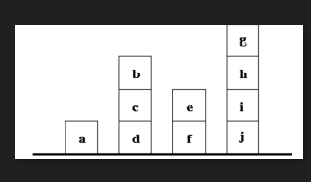